<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Calculating:
* [Risk of a stock](#first-bullet)
* [Covariance and Correlation between stocks](#second-bullet)
* [Portfolio risk](#third-bullet)
* [Diversifiable and Non-Diversifiable risk](#fourth-bullet)
* [The Markowitz Efficient Frontier](#fifth-bullet)

In [1]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Calculating the Risk of a Security <a class="anchor" id="first-bullet"></a>

The data for the stocks - Microsoft (‘MSFT’), Apple ('AAPL'), Walmart (WMT) and Facebook (FB) is available from Google Finance. We will download it from ‘2014-1-1’ to calculate the annual risk and return of each stock.

In [3]:
# data = pd.DataFrame()
# tickers = ['MSFT','AAPL','WMT','FB']

# for t in tickers:
#     data[t] = wb.DataReader(t, 'google', start = '2014-1-1')['Close']
    
# data.head()

#Since data from Google Finance is not available we will import the data from a csv file. 

data1 = pd.read_csv('MSFT_AAPL_2000_2017.csv')
data1 = data1[data1['Date'] >= '2014-01-01']
data1 = data1.set_index('Date')

data2 = pd.read_csv('Walmart_FB_2014_2017.csv')
data2 = data2[data2['Date'] >= '2014-01-01']
data2 = data2.set_index('Date')
data2.head()

data = pd.concat([data1,data2], axis = 1)
data = data.dropna(axis = 0)
data.head()

,MSFT,AAPL,WMT,FB
2014-01-02,33.690468,73.522530,71.325287,54.709999
2014-01-03,33.463810,71.907555,71.090279,54.560001
2014-01-06,32.756634,72.299644,70.692558,57.200001
2014-01-07,33.010487,71.782608,70.909485,57.919998
2014-01-08,32.421169,72.237190,70.349083,58.230000


In [4]:
#Log returns
sec_returns = np.log(data/data.shift(1))
sec_returns.head()

,MSFT,AAPL,WMT,FB
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,-0.006750,-0.022211,-0.003300,-0.002745
2014-01-06,-0.021359,0.005438,-0.005610,0.047253
2014-01-07,0.007720,-0.007177,0.003064,0.012509
2014-01-08,-0.018014,0.006313,-0.007934,0.005338


Daily risk:

In [5]:
sec_returns[['MSFT','AAPL','WMT','FB']].std()

MSFT    0.014420
AAPL    0.014826
WMT     0.011272
FB      0.018324
dtype: float64

Annual risk:

To annualize the daily volatility, it needs to be muliplied by the square root of 250.

In [6]:
sec_returns[['MSFT','AAPL','WMT','FB']].std() * 250 ** 0.5

MSFT    0.228002
AAPL    0.234418
WMT     0.178223
FB      0.289727
dtype: float64

Annual returns:

In [7]:
sec_returns[['MSFT','AAPL','WMT','FB']].mean() * 250

MSFT    0.198564
AAPL    0.198077
WMT    -0.010388
FB      0.288605
dtype: float64

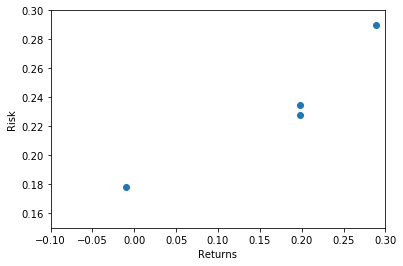

In [8]:
#Plotting the values to visualize their variation
r = sec_returns.mean() * 250
v = sec_returns.std() * 250 ** 0.5
plt.scatter(r,v)
plt.axis([-0.1,0.3,0.15,0.3])
plt.xlabel("Returns")
plt.ylabel("Risk")
plt.show()

#### We can conclude a stock with higher returns has higher volatility or risk. 

------------------------------------------------------------------------------------------------------------------

## Calculating Covariance and Correlation between stocks <a class="anchor" id="second-bullet"></a>

In [9]:
#Mean Annual Log returns 
mean_sec_returns_a = sec_returns.mean() * 250
mean_sec_returns_a

MSFT    0.198564
AAPL    0.198077
WMT    -0.010388
FB      0.288605
dtype: float64

In [10]:
#Daily Covariance
cov_d = sec_returns.cov()
cov_d

,MSFT,AAPL,WMT,FB
MSFT,0.000208,0.000093,0.000047,0.000109
AAPL,0.000093,0.000220,0.000040,0.000101
WMT,0.000047,0.000040,0.000127,0.000036
FB,0.000109,0.000101,0.000036,0.000336


In [11]:
#Annual Covariance
cov_a = sec_returns.cov() * 250
cov_a

,MSFT,AAPL,WMT,FB
MSFT,0.051985,0.023169,0.011778,0.027189
AAPL,0.023169,0.054952,0.010089,0.025335
WMT,0.011778,0.010089,0.031763,0.008917
FB,0.027189,0.025335,0.008917,0.083942


In [12]:
#Correlation
corr = sec_returns.corr()
corr

,MSFT,AAPL,WMT,FB
MSFT,1.000000,0.433480,0.289845,0.411596
AAPL,0.433480,1.000000,0.241496,0.373029
WMT,0.289845,0.241496,1.000000,0.172698
FB,0.411596,0.373029,0.172698,1.000000


#### The above correlation table shows the correlation between the returns of the 4 stocks and NOT the correlation between the stock price.

Notice that correlation of the returns between Walmart and Microsoft, Apple or Facebook is less, since Walmart operates in an industry different from Microsoft, Apple and Faccebook.

In conclusion, we would consider a portfolio of the stocks of Walmart and Facebook since they have a very low correlation. 

-----------------------------------------------------------------------------------------------------------------

## Calculating Portfolio Risk <a class="anchor" id="third-bullet"></a>

We will calculate the risk of an equally weighted portfolio composed of Walmart, Microsoft, Apple and Facebook.

In [13]:
#Equally weighted scheme
weights = np.array([0.25,0.25,0.25,0.25])

In [14]:
#Portfolio Variance
pf_var = np.dot(weights.T,np.dot(sec_returns.cov() * 250,weights)) 
pf_var

0.027224846152427127

In [15]:
#Portfolio Volatility
pf_vol = np.dot(weights.T,np.dot(sec_returns.cov() * 250,weights)) ** 0.5
print("Annual risk of portfolio containing stocks of Walmart, Microsoft, Apple and Facebook:",np.round(pf_vol*100,3),"%")

Annual risk of portfolio containing stocks of Walmart, Microsoft, Apple and Facebook: 16.5 %


-----------------------------------------------------------------------------------------------------------------

## Calculating Diversifiable and Non-Diverisifiable Risk <a class="anchor" id="fourth-bullet"></a>

We will calculate the Diversifiable and Non-Diverisifiable risk of an equally weighted portfolio composed of Walmart, Microsoft, Apple and Facebook.

#### Annual Diversifiable Risk + Annual Non-Diversifiable Risk = Portfolio Variance
where Annual Non-Diversifiable Risk = Weighted Annual Variances

In [16]:
#Create an annual variance list
var_a = sec_returns[['MSFT','AAPL','WMT','FB']].var() * 250

var_a

MSFT    0.051985
AAPL    0.054952
WMT     0.031763
FB      0.083942
dtype: float64

In [17]:
#Calculating the annual non-diversifiable risk by calculating the sum of weighted annual variances
tickers = ['MSFT','AAPL','WMT','FB']
n_dr_a = 0

i=0
for t in tickers:
    n_dr_a += weights[i] ** 2 * var_a[t]
    i+=1
    
print("Non-Diversifiable Risk: ",np.round(n_dr_a*100,3),"%")

Non-Diversifiable Risk:  1.392 %


In [18]:
print("Diversifiable Risk: ",np.round((pf_var - n_dr_a)*100,3),"%")

Diversifiable Risk:  1.331 %


--------------------------------------------------

## Generating The Markowitz Efficient Frontier <a class="anchor" id="fifth-bullet"></a>

Markowitz suggests that there is a set of efficient portfolios that can provide a higher expected rate of return for the same or lower amount of risk. The group of portfolios is called an efficient frontier. <br >

We will generate the Markowitz Efficient Frontier for portfolios with the four stocks with multiple weights.

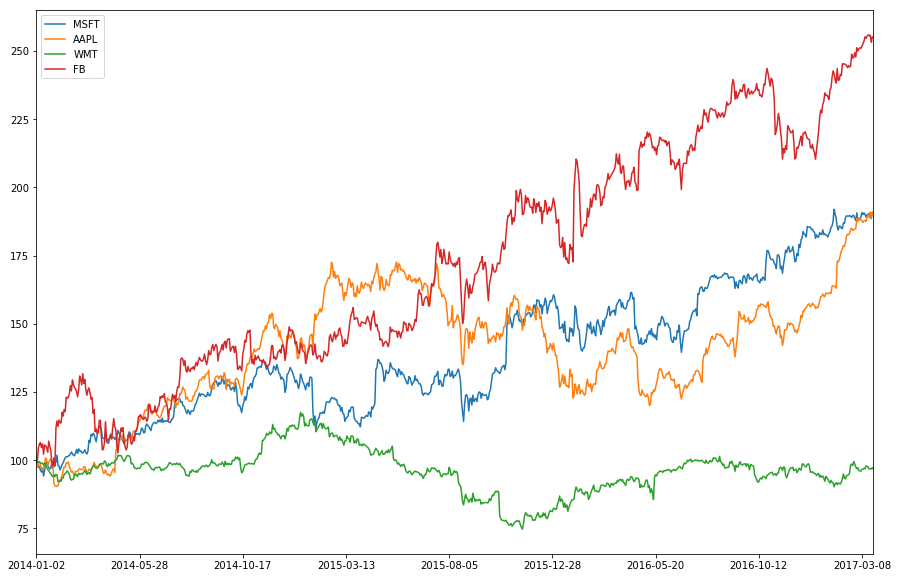

In [19]:
#Normalize data to 100 and check it's variation in the given timeframe
(data/data.iloc[0] * 100).plot(figsize=(15,10))
plt.show()

In [20]:
#Number of assets
num_assets = len(tickers)
num_assets

4

In [21]:
#Create two empty lists - portfolio returns and portfolio volatility
pfolio_returns = []
pfolio_volatilities = []

In [22]:
#Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained 
#values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * sec_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(sec_returns.cov() * 250, weights))))

In [23]:
#Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites.
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [24]:
#Minimum Risk
min_risk = min(pfolio_volatilities)
min_risk

0.14913767860510105

In [25]:
#Number of portfolios with minimum risk
np.sum(pfolio_volatilities == min_risk)

1

In [30]:
#Return corresponding to the lowest risk
min_risk_r = pfolio_returns.item(np.where(pfolio_volatilities == min_risk))
min_risk_r

C:\Users\piyus\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


0.089742829951949

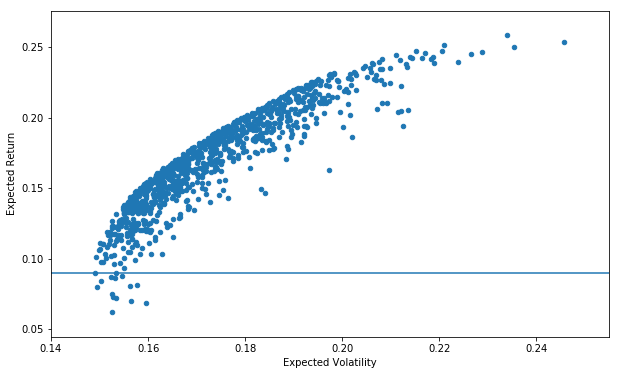

In [31]:
#Create a dataframe to plot the variation between portfolio return and volatility
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

portfolios.plot('Volatility', 'Return', kind='scatter', figsize=(10, 6));
plt.axhline(y=min_risk_r)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

From the above plot of a Markowitz Efficient Frontier we can observe that the minimum risk an investor could bear is less than 15%. 

#### The set of portfolios above the expected return corresponding to the minimum risk (9% in this case) are called The Efficient Frontier. 

--------------------------------------------------